In [4]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Human 

In [2]:
coh_folder = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/coh/'
pli_folder = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/pli/'
wpli_folder = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/wpli/'
plv_folder = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/plv/'

delta_coh = pd.read_csv(coh_folder + 'delta_graph_theory.csv')
theta_coh = pd.read_csv(coh_folder + 'theta_graph_theory.csv')
sigma_coh = pd.read_csv(coh_folder + 'sigma_graph_theory.csv')
beta_coh = pd.read_csv(coh_folder + 'beta_graph_theory.csv')


delta_pli = pd.read_csv(pli_folder + 'delta_graph_theory.csv')
theta_pli = pd.read_csv(pli_folder + 'theta_graph_theory.csv')
sigma_pli = pd.read_csv(pli_folder + 'sigma_graph_theory.csv')
beta_pli = pd.read_csv(pli_folder + 'beta_graph_theory.csv')

delta_wpli = pd.read_csv(wpli_folder + 'delta_graph_theory.csv')
theta_wpli = pd.read_csv(wpli_folder + 'theta_graph_theory.csv')
sigma_wpli = pd.read_csv(wpli_folder + 'sigma_graph_theory.csv')
beta_wpli = pd.read_csv(wpli_folder + 'beta_graph_theory.csv')

delta_plv = pd.read_csv(plv_folder + 'delta_graph_theory.csv')
theta_plv = pd.read_csv(plv_folder + 'theta_graph_theory.csv')
sigma_plv = pd.read_csv(plv_folder + 'sigma_graph_theory.csv')
beta_plv = pd.read_csv(plv_folder + 'beta_graph_theory.csv')

In [18]:
all_columns = delta_coh.iloc[:, 4:].columns.tolist()
all_columns 

['Frequency',
 'Transitivity_delta_coh',
 'glob_eff_delta_coh',
 'avg_clust_coeff_delta_coh',
 'modularity_delta_coh',
 'ocular_wf_close_delta_coh',
 'central_wf_close_delta_coh',
 'occip_wf_close_delta_coh']

In [23]:
def separate_columns(df, frequency = "_delta_coh"):
    # List of columns to keep as identifier variables
    
    id_vars = ["Idx", "Patient_ID", "Genotype", "Frequency"]

    # List of columns to melt into 'frequency' values
    value_vars = df.columns.difference(id_vars)

    # Perform the melt operation to reshape the DataFrame
    melted_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name="regions_frequency")
    
    # Split the 'regions_frequency' column into 'regions' and 'frequency' columns
    melted_df[["regions", "frequency"]] = melted_df["regions_frequency"].str.split((str(frequency)), expand=True)

    #Drop the original 'regions_frequency' column
    melted_df.drop(columns=["regions_frequency"], inplace=True)
    melted_df.drop(columns=["frequency"], inplace=True)
    
    # Group the DataFrame by 'Animal_ID' and 'frequency', and calculate the mean value within each group
    averaged_df = melted_df.groupby(['Patient_ID', 'Frequency', 'Genotype', 'regions'], as_index=False)['value'].mean()
    
    return melted_df, averaged_df

In [47]:
delta_melted_df, delta_averaged_df = separate_columns(delta_plv, frequency = "_delta_plv")
theta_melted_df, theta_averaged_df = separate_columns(theta_plv, frequency = "_theta_plv")
sigma_melted_df, sigma_averaged_df = separate_columns(sigma_plv, frequency = "_sigma_plv")
beta_melted_df, beta_averaged_df = separate_columns(beta_plv, frequency = "_beta_plv")

In [48]:
theta_melted_df

,Idx,Patient_ID,Genotype,Frequency,value,regions
0,95,P15 N1,GAP,theta,0.750000,Transitivity
1,96,P15 N1,GAP,theta,0.882353,Transitivity
2,138,P15 N1,GAP,theta,1.000000,Transitivity
3,193,P15 N1,GAP,theta,1.000000,Transitivity
4,200,P15 N1,GAP,theta,0.882353,Transitivity
...,...,...,...,...,...,...
52795,1610,P11 N1,WT,theta,0.916667,ocular_wf_close
52796,1665,P11 N1,WT,theta,0.916667,ocular_wf_close
52797,1672,P11 N1,WT,theta,0.812500,ocular_wf_close
52798,1674,P11 N1,WT,theta,0.857143,ocular_wf_close


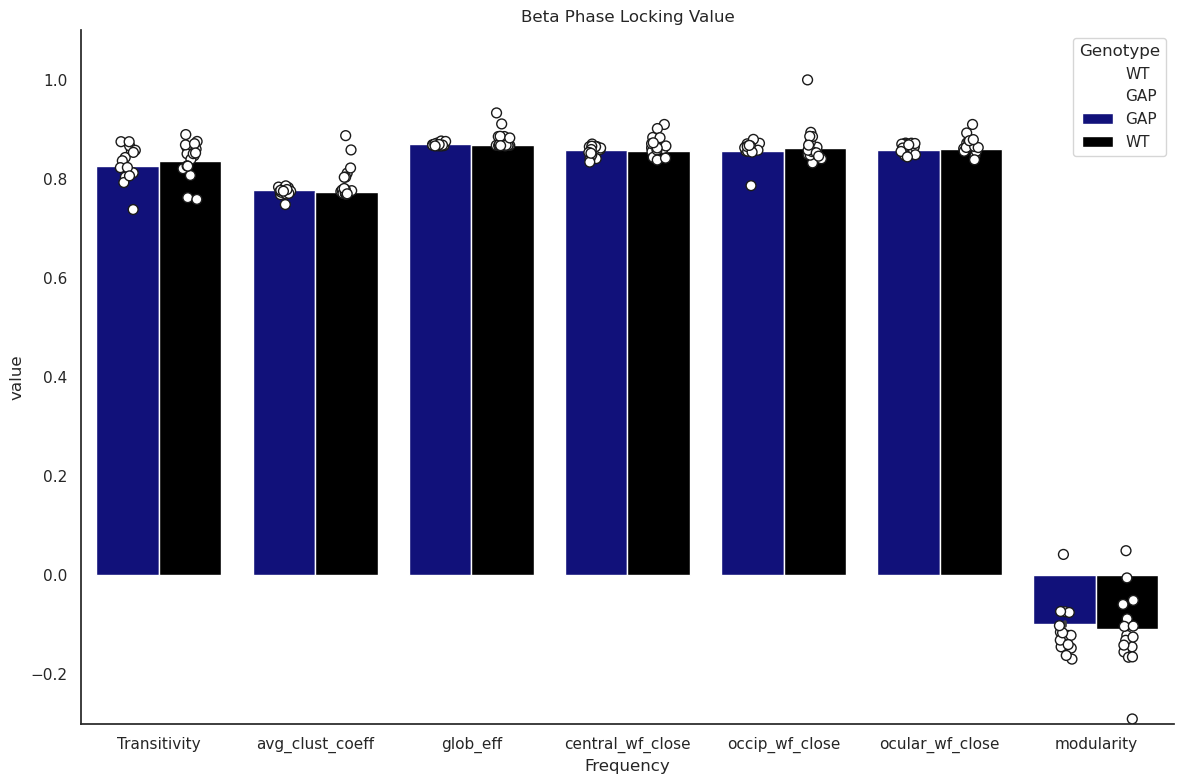

In [60]:
# Set the style
sns.set(style="white")
custom_palette = {"GAP": "darkblue", "WT": "black"}
custom_palette_strip = {"GAP": 'white', "WT": "white"}  # Tuple (fill color, outline color)

desired_order = ['Transitivity', 'avg_clust_coeff', 'glob_eff', 'central_wf_close', 'occip_wf_close',
                'ocular_wf_close', 'modularity']

# Create the barplot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x="regions", y="value", hue="Genotype", data= beta_melted_df, 
                      order = desired_order, palette=custom_palette)
sns.despine()

# Add labels and title
plt.xlabel("Frequency")
plt.ylabel("value")
plt.title("Beta Phase Locking Value")
plt.ylim(-0.3, 1.1)

stripplot = sns.stripplot(x="regions",y="value",hue="Genotype",data=beta_averaged_df,jitter=True,dodge=True,
                         size=5, palette = custom_palette_strip, order = desired_order,
                         edgecolor = 'k', sizes = (50, 50), linewidth = 1)

# Ensure stripplot is placed over the bars by adjusting the z-order
#stripplot.set_zorder(10)  # Place stripplot in front of the barplot

# Show the plot
#plt.xticks(rotation=45)  
plt.tight_layout()  

os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/plots/')
plt.savefig("beta_plv_graph.png", dpi=300, bbox_inches="tight")
plt.savefig("beta_plv_graph.svg", dpi=300, bbox_inches="tight")
plt.show()

## Rats

In [5]:
coh_folder = '/home/melissa/RESULTS/FINAL_MODEL/Rat/Graph_Theory/coh/'
pli_folder = '/home/melissa/RESULTS/FINAL_MODEL/Rat/Graph_Theory/pli/'
wpli_folder = '/home/melissa/RESULTS/FINAL_MODEL/Rat/Graph_Theory/wpli/'
plv_folder = '/home/melissa/RESULTS/FINAL_MODEL/Rat/Graph_Theory/plv/'

delta_coh = pd.read_csv(coh_folder + 'coh_delta.csv')
theta_coh = pd.read_csv(coh_folder + 'coh_theta.csv')
sigma_coh = pd.read_csv(coh_folder + 'coh_sigma.csv')
beta_coh = pd.read_csv(coh_folder + 'coh_beta.csv')
gamma_coh = pd.read_csv(coh_folder + 'coh_gamma.csv')

delta_pli = pd.read_csv(pli_folder + 'pli_delta.csv')
theta_pli = pd.read_csv(pli_folder + 'pli_theta.csv')
sigma_pli = pd.read_csv(pli_folder + 'pli_sigma.csv')
beta_pli = pd.read_csv(pli_folder + 'pli_beta.csv')
gamma_pli = pd.read_csv(pli_folder + 'pli_gamma.csv')

delta_wpli = pd.read_csv(wpli_folder + 'wpli_delta.csv')
theta_wpli = pd.read_csv(wpli_folder + 'wpli_theta.csv')
sigma_wpli = pd.read_csv(wpli_folder + 'wpli_sigma.csv')
beta_wpli = pd.read_csv(wpli_folder + 'wpli_beta.csv')
gamma_wpli = pd.read_csv(wpli_folder + 'wpli_gamma.csv')

delta_plv = pd.read_csv(plv_folder + 'plv_delta.csv')
theta_plv = pd.read_csv(plv_folder + 'plv_theta.csv')
sigma_plv = pd.read_csv(plv_folder + 'plv_sigma.csv')
beta_plv = pd.read_csv(plv_folder + 'plv_beta.csv')
gamma_plv = pd.read_csv(plv_folder + 'plv_gamma.csv')

In [12]:
delta_coh

,Unnamed: 0,Idx,Animal_ID,Transitivity_delta_coh,glob_eff_delta_coh,avg_clust_coeff_delta_coh,modularity_delta_coh,soma_wf_close_delta_coh,motor_wf_close_delta_coh,visual_wf_close_delta_coh
0,0,0,S7088,0.861272,0.752747,0.830700,0.032752,0.641589,0.765934,0.681150
1,0,1,S7088,0.878327,0.750916,0.769166,0.008552,0.599112,0.777430,0.695266
2,0,3,S7088,0.814961,0.752747,0.795341,0.030580,0.628402,0.777828,0.669231
3,0,4,S7088,0.851272,0.749084,0.814889,0.057440,0.595435,0.757634,0.700621
4,0,5,S7088,0.774194,0.818681,0.845295,0.054886,0.761861,0.776819,0.690354
...,...,...,...,...,...,...,...,...,...,...
247242,0,34552,S7086,0.740426,0.822344,0.785843,0.106536,0.811039,0.756855,0.668870
247243,0,34555,S7086,0.746835,0.822344,0.763636,0.045027,0.800551,0.707684,0.755413
247244,0,34556,S7086,0.709328,0.824176,0.703082,0.066810,0.814093,0.722968,0.717670
247245,0,34558,S7086,0.771084,0.820513,0.841765,0.052661,0.831162,0.748485,0.678406


In [14]:
all_columns = delta_coh.iloc[:, 3:].columns.tolist()
all_columns

['Transitivity_delta_coh',
 'glob_eff_delta_coh',
 'avg_clust_coeff_delta_coh',
 'modularity_delta_coh',
 'soma_wf_close_delta_coh',
 'motor_wf_close_delta_coh',
 'visual_wf_close_delta_coh']

In [39]:
def separate_columns(df, frequency = "_delta_coh"):
    # List of columns to keep as identifier variables
    
    ##genotype
    wildtype_animal_ids = ['S7068', 'S7070', 'S7071', 'S7074', 'S7086', 'S7087', 'S7091', 'S7098', 'S7101']
    gap_animal_ids = ['S7063', 'S7064', 'S7069', 'S7072', 'S7075', 'S7076', 'S7088', 'S7092', 'S7094', 'S7096']
    
    id_vars = ["Idx", "Animal_ID"]

    # List of columns to melt into 'frequency' values
    value_vars = df.columns.difference(id_vars)

    # Perform the melt operation to reshape the DataFrame
    melted_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name="regions_frequency")
    
    # Split the 'regions_frequency' column into 'regions' and 'frequency' columns
    melted_df[["regions", "frequency"]] = melted_df["regions_frequency"].str.split((str(frequency)), expand=True)

    #Drop the original 'regions_frequency' column
    melted_df.drop(columns=["regions_frequency"], inplace=True)
    melted_df.drop(columns=["frequency"], inplace=True)
    
    melted_df['Genotype'] = melted_df['Animal_ID'].apply(lambda x: 'gap' if x in gap_animal_ids else ('wt' if x in wildtype_animal_ids else None))
    
    # Group the DataFrame by 'Animal_ID' and 'frequency', and calculate the mean value within each group
    averaged_df = melted_df.groupby(["Idx", "Animal_ID", "Genotype", "regions"], as_index=False)['value'].mean()
    
    return melted_df, averaged_df

In [40]:
delta_melted_df, delta_averaged_df = separate_columns(delta_plv, frequency = "_delta_plv")
theta_melted_df, theta_averaged_df = separate_columns(theta_plv, frequency = "_theta_plv")
sigma_melted_df, sigma_averaged_df = separate_columns(sigma_plv, frequency = "_sigma_plv")
beta_melted_df, beta_averaged_df = separate_columns(beta_plv, frequency = "_beta_plv")
gamma_melted_df, gamma_averaged_df = separate_columns(gamma_plv, frequency = "_gamma_plv")

In [48]:
delta_melted_df

,Idx,Animal_ID,value,regions,Genotype


In [43]:
np.unique(delta_melted_df['regions'])

array(['Transitivity', 'Unnamed: 0', 'avg_clust_coeff', 'glob_eff',
       'modularity', 'motor_wf_close', 'soma_wf_close', 'visual_wf_close'],
      dtype=object)

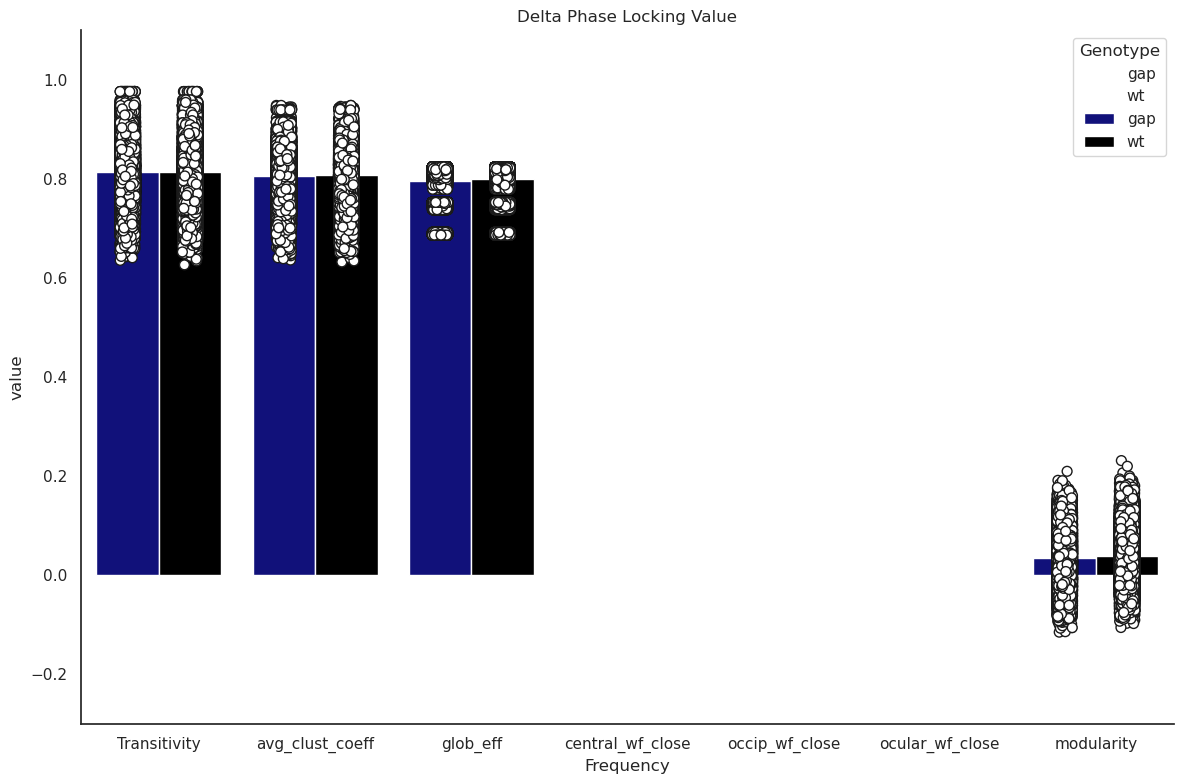

In [42]:
# Set the style
sns.set(style="white")
custom_palette = {"gap": "darkblue", "wt": "black"}
custom_palette_strip = {"gap": 'white', "wt": "white"}  # Tuple (fill color, outline color)

desired_order = ['Transitivity', 'avg_clust_coeff', 'glob_eff', 'central_wf_close', 'occip_wf_close',
                'ocular_wf_close', 'modularity']

# Create the barplot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x="regions", y="value", hue="Genotype", data= delta_melted_df, 
                      order = desired_order, palette=custom_palette)
sns.despine()

# Add labels and title
plt.xlabel("Frequency")
plt.ylabel("value")
plt.title("Delta Phase Locking Value")
plt.ylim(-0.3, 1.1)

stripplot = sns.stripplot(x="regions",y="value",hue="Genotype",data= delta_averaged_df,jitter=True,dodge=True,
                         size=5, palette = custom_palette_strip, order = desired_order,
                         edgecolor = 'k', sizes = (50, 50), linewidth = 1)

# Ensure stripplot is placed over the bars by adjusting the z-order
#stripplot.set_zorder(10)  # Place stripplot in front of the barplot

# Show the plot
#plt.xticks(rotation=45)  
plt.tight_layout()  

os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Rat/Graph_Theory/')
plt.savefig("delta_plv_graph.png", dpi=300, bbox_inches="tight")
plt.savefig("delta_plv_graph.svg", dpi=300, bbox_inches="tight")
plt.show()